# Kernel Support Vector Machine (SVM)
* Notebook by Adam Lang
* Date: 4/29/2024
* We will go over the basics of the Kernel Support Vector Machine and how it differs from the "vanilla" SVM and then demonstrate its implementation in Python.

## What happens if we are not able to linearly separate our data points?
* Below we have a 2D circular plot, how can we linearly separate this?

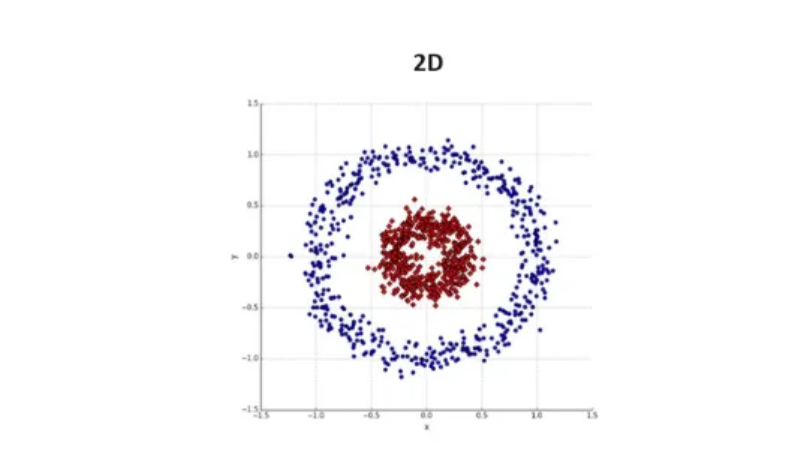

source: https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d#:~:text=SVM%20utilizes%20kernel%20functions%20to,non%2Dlinear%20problems%20as%20well.

## Higher Dimensional Spaces
1. 1D => 2D mapping

* One method to move from 1D to 2D is to use the "polynomial" kernel method which is to add the squared terms of the parameters creating a polynomial or quadratic function:

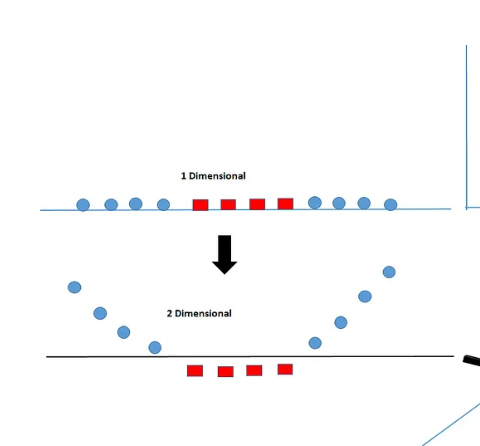

We can see that you are able to now linearly separate the data by squaring the values and increasing the dimension.

2. 2D => 3D mapping
* Convert data from 2D to 3D in order to linearly separate data and us a hyperplane.
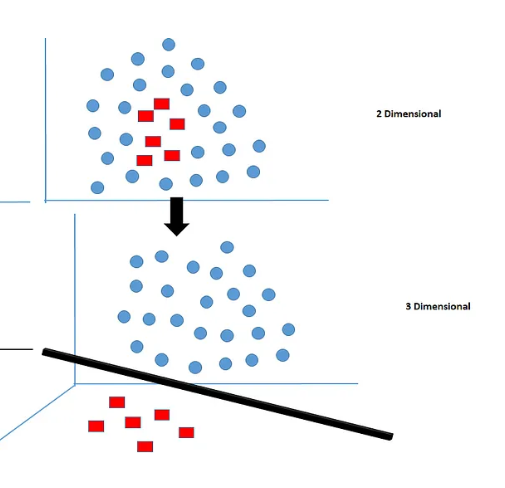

### Problem: Mapping to a higher dimensional space can be highly compute-intensive
* There are 3 types of kernel transformations:
1. 'poly'
2. 'rbf'
3. 'sigmoid'

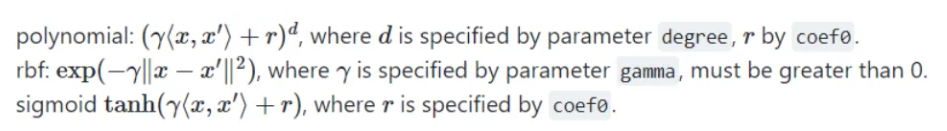

source: https://medium.com/@soumallya160/everything-you-need-to-know-about-support-vector-machine-8e343658c9e7

# Gaussian RBF Kernel
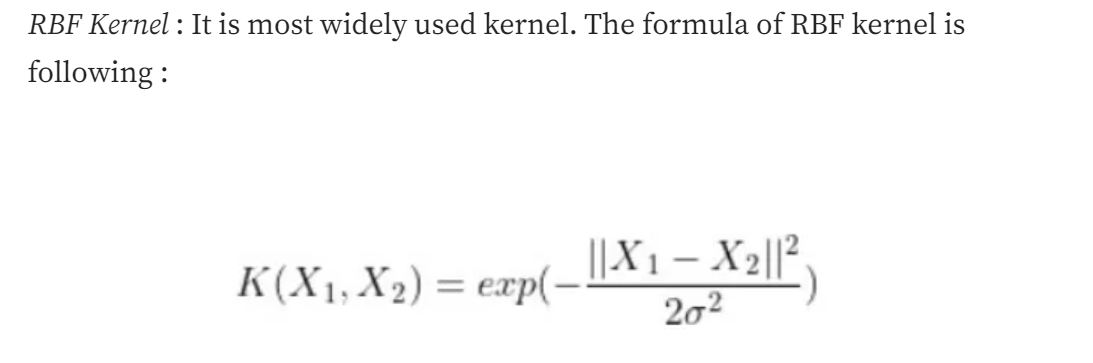

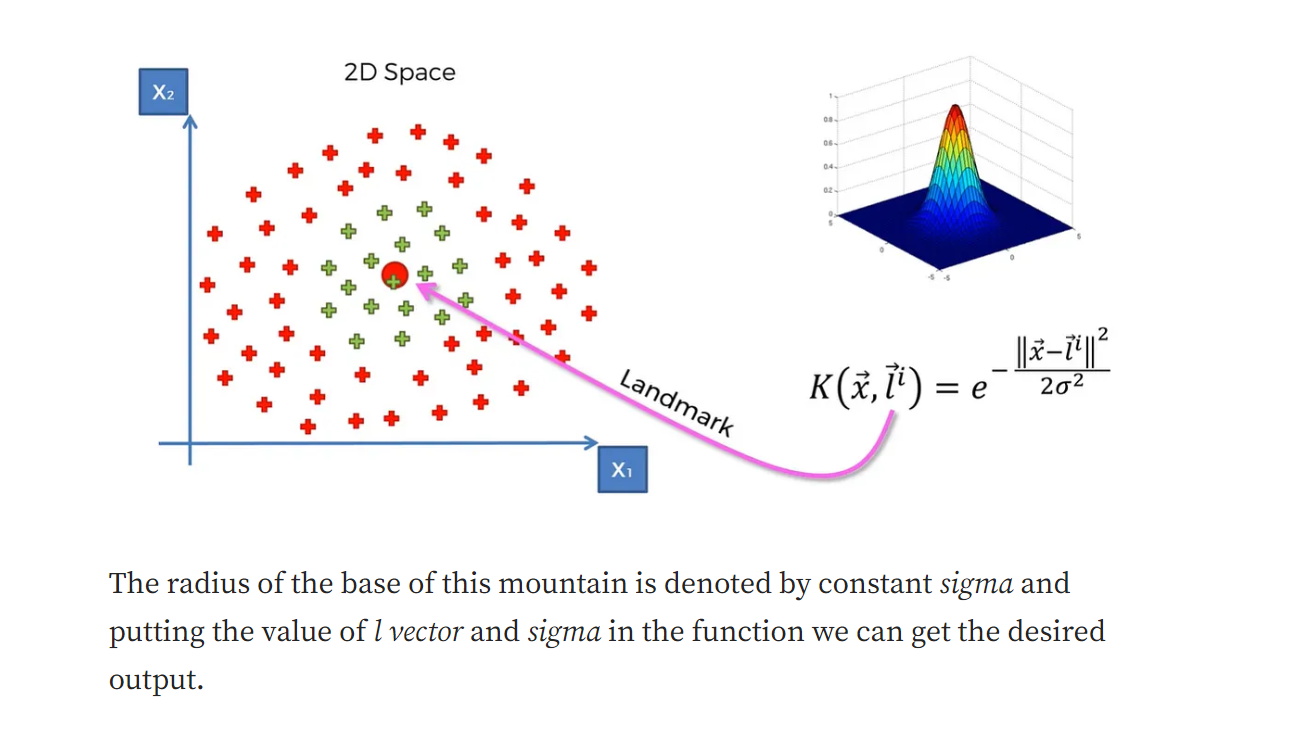

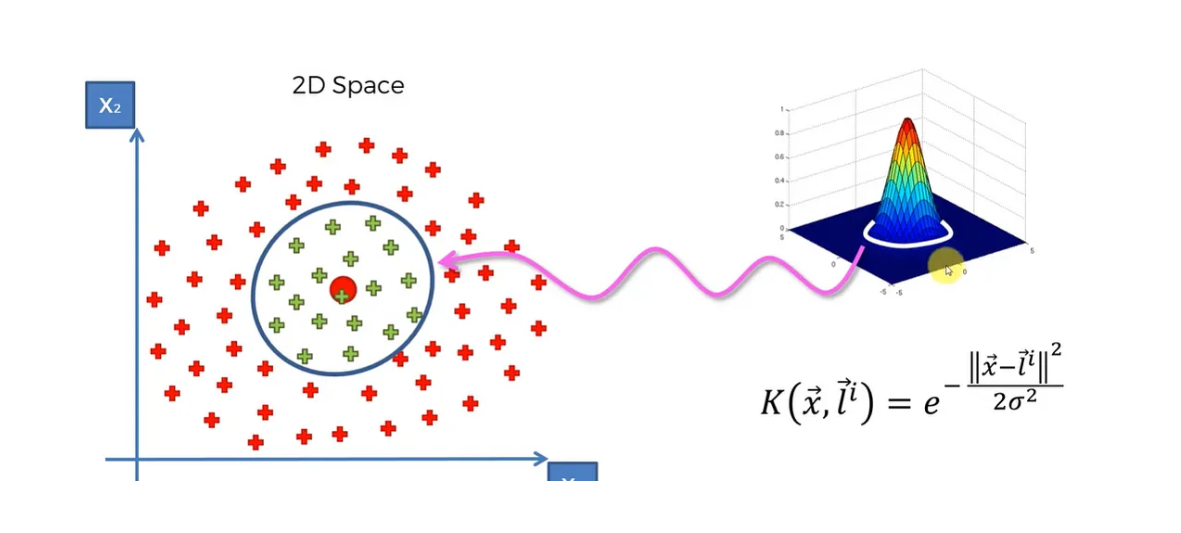

Source: https://medium.com/@suvigya2001/the-gaussian-rbf-kernel-in-non-linear-svm-2fb1c822aae0

## Kernel Trick summarized
* All computations are done in 2D space (lower dimension) with reference to higher dimensional (e.g. 3D spaces).
* Allows us to create a non-linear decision boundary in lower dimensions.
* Circumference allows us to take all points within given values > 0.
    * Mathematically used to separate green from red.
        * **All points within circumference are > 0.**
        * **All points outside of circumference are < 0.**
* Increasing sigma => increases kernel circumference.
* Decreasing sigma => decreases kernel circumference.

# Types of Kernel Functions
1. Gaussian RBF kernel
2. Sigmoid Kernel
3. Polynomial Kernel

# Non-Linear SVR (Support Vector Regression)
* 3D hyperplanes are used to build 2D hyperplanes in a vector space.
* RBF function intersection with hyperplanes -> epsilon sensitive spaces.
* Source: Machine-Learning-A-Z udemy:

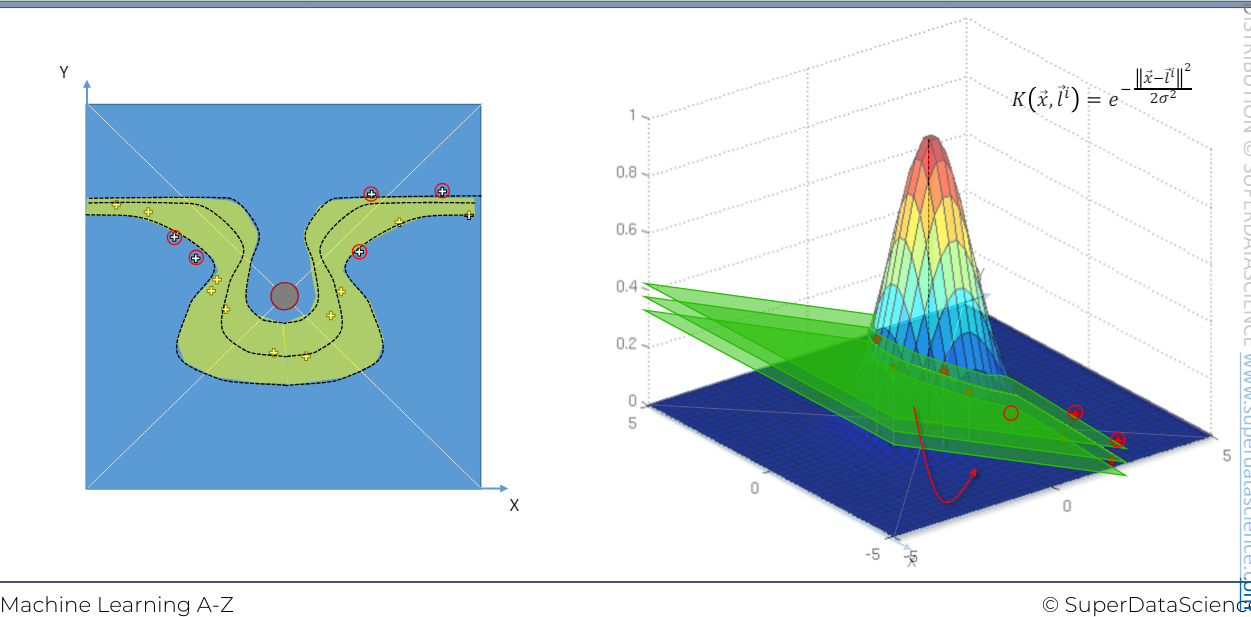

Note: In reality we don't have to go to 3D computationally (too complex and/or expensive). Every computation can be done in 2D.

# Kernel SVM Python Implementation
* We will use the same dataset as previously used in the vanilla SVM model: "Social Network Ads".
    * A quick recall on the dataset details:
        * 1. There are 3 columns
            * a. Age (of each customer)
            * b. Estimated Salary (each customers salary)
            * c. Purchased (categorical variable - tells whether a customer purchased an SUV (1) vs. no purchase (0).


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Dataset path

In [2]:
data_path = '/content/drive/MyDrive/Springboard_Data_Science/Supervised Learning/SVM and Kernels/Social_Network_Ads.csv'

## Upload dataset

In [4]:
dataset = pd.read_csv(data_path)

In the previous notebook we performed EDA so we will just go through the alternative modeling in this notebook the kernel SVM.

In [5]:
## Instaniate X and y values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
## look at len of X and y
print(len(X), len(y))

400 400


## Train Test Splits

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [8]:
## view of X_train
X_train

array([[    57, 122000],
       [    39,  71000],
       [    47,  25000],
       [    24,  19000],
       [    36,  50000],
       [    32, 150000],
       [    48,  29000],
       [    30, 107000],
       [    60,  34000],
       [    38,  61000],
       [    33,  31000],
       [    39,  71000],
       [    55,  39000],
       [    49,  39000],
       [    43, 112000],
       [    27,  20000],
       [    26,  17000],
       [    37,  93000],
       [    42,  54000],
       [    35,  61000],
       [    29,  75000],
       [    38,  80000],
       [    45,  26000],
       [    54, 108000],
       [    46,  23000],
       [    23,  28000],
       [    37,  75000],
       [    42,  65000],
       [    35,  71000],
       [    51, 146000],
       [    39,  96000],
       [    24,  89000],
       [    58,  95000],
       [    25,  22000],
       [    41,  59000],
       [    28,  89000],
       [    42,  80000],
       [    42, 108000],
       [    46,  96000],
       [    47, 113000],


In [9]:
## view of X_test
X_test[:5]

array([[   46, 22000],
       [   59, 88000],
       [   28, 44000],
       [   48, 96000],
       [   29, 28000]])

In [10]:
## view of y_train
y_train[:5]

array([1, 0, 1, 0, 0])

In [11]:
## view of y_test
y_test[:5]

array([0, 1, 0, 1, 0])

## Feature Engineering

In [12]:
from sklearn.preprocessing import StandardScaler

## instantiate standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
## look at scaling for X_train
X_train

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926],
       [-0.56234321,  2.33980255],
       [ 1.0088136 , -1.19473064],
       [-0.75873781,  1.08372877],
       [ 2.1871812 , -1.04867555],
       [ 0.0268406 , -0.25997806],
       [-0.46414591, -1.1363086 ],
       [ 0.1250379 ,  0.03213212],
       [ 1.6961947 , -0.90262046],
       [ 1.1070109 , -0.90262046],
       [ 0.5178271 ,  1.22978386],
       [-1.05332971, -1.4576298 ],
       [-1.15152701, -1.54526286],
       [-0.0713567 ,  0.67477452],
       [ 0.4196298 , -0.46445519],
       [-0.2677513 , -0.25997806],
       [-0.85693511,  0.14897619],
       [ 0.0268406 ,  0.29503128],
       [ 0.7142217 , -1.28236369],
       [ 1.5979974 ,  1.11293979],
       [ 0.812419  , -1.36999675],
       [-1.44611891, -1.22394166],
       [-0.0713567 ,  0.14897619],
       [ 0.4196298 , -0.14313399],
       [-0.2677513 ,

In [14]:
## scaling for X_test
X_test

array([[ 0.812419  , -1.39920777],
       [ 2.0889839 ,  0.52871943],
       [-0.95513241, -0.75656537],
       [ 1.0088136 ,  0.76240757],
       [-0.85693511, -1.22394166],
       [-0.75873781, -0.23076704],
       [ 0.9106163 ,  1.08372877],
       [-0.85693511,  0.38266434],
       [ 0.2232352 ,  0.14897619],
       [ 0.4196298 , -0.14313399],
       [-0.2677513 , -0.14313399],
       [ 1.4998001 , -1.04867555],
       [-1.44611891, -0.6397213 ],
       [-1.74071081, -1.36999675],
       [-0.75873781,  0.49950841],
       [-0.2677513 ,  1.11293979],
       [ 1.4016028 , -0.93183148],
       [ 0.812419  ,  0.11976517],
       [ 0.1250379 , -0.8149874 ],
       [ 1.794392  , -0.28918908],
       [-1.54431621, -1.25315268],
       [-0.85693511,  0.29503128],
       [ 0.9106163 , -1.36999675],
       [ 2.0889839 ,  0.17818721],
       [-1.83890811, -1.48684082],
       [ 1.3034055 , -1.36999675],
       [ 0.4196298 ,  0.29503128],
       [-0.0713567 , -0.49366621],
       [ 1.6961947 ,

## Model Training
* Here we will train the Kernel SVM model on the training data.
* The change compared to a "vanilla SVM" is changing the kernel to 'rbf' or radial basis kernel.

In [15]:
from sklearn.svm import SVC

## setup model
classifier = SVC(kernel = 'rbf', random_state=42) ## using the rbf function
classifier.fit(X_train, y_train)

SVC(random_state=42)

## Predict new result using model
* Use same prediction points as previous SVM model.
* We will predict based on our model, whether a 30 yr old customer with an estimated salary of 87,000 dollars will buy an SUV.

In [16]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


Summary: The model predicted 0, which means the likelihood is no, this customer profile will not purchase an SUV.

## Predict test set results

In [17]:
# create y_pred and predict on X_test data
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


## Confusion Matrix


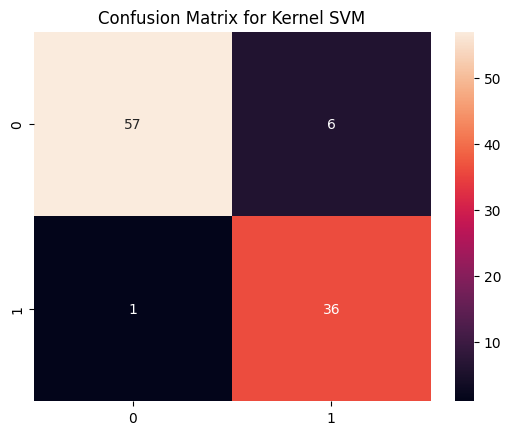

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

## print confusion matrix
sns.heatmap(cm,annot=True).set(title="Confusion Matrix for Kernel SVM")
plt.show();

Results summary:
* 57 true positives
* 6 false positives
* 1 false negative
* 36 true negatives

Comparing this to the "vanilla SVM" in the previous notebook:
* The vanilla SVM had 66 true positives so this model did have 9 less.
* The vanilla SVM had 2 false positives so we improved upon that.
* The vanilla SVM had 8 false negatives, so we also improved upon that.
* The vanilla SVM had 24 true negatives, here we have 36 so we did improve upon this as well being able to classify the true negative predictions.

## Accuracy Evaluation

In [19]:
accuracy_score(y_test, y_pred)

0.93

Note: accuracy is the same as the vanilla SVM model.

## Precision Evaluation

In [20]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8571428571428571

## Recall Evaluation

In [21]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.972972972972973

Summary:
* We can see the recall was higher than the precision here and the precision for the vanilla SVM was 92.3% whereas in the kernel SVM it was 85.7%, but the recall is higher, thus illustrating the precision-recall tradeoff.
* The recall score being higher hints the model was better at identifying true positive preditions.


## Visualize Kernel SVM - Training Results


<ipython-input-22-c80f9a1308b9>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


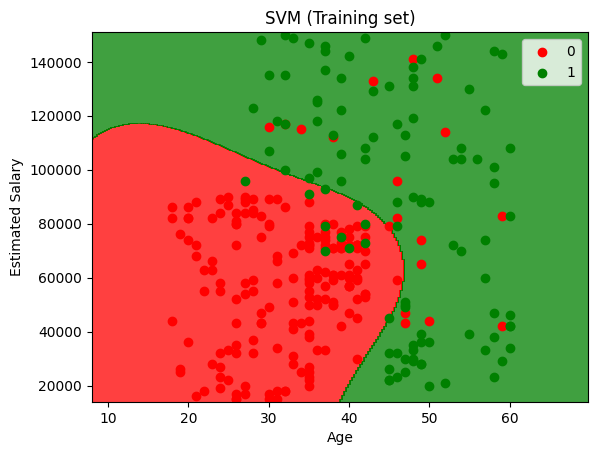

In [22]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

Summary of Training Result:
* We can see the non-linear hyperplane of the `rbf` kernel SVM was more precise than the linear or vanilla SVM in being able to determine a more accurate decision boundary as well as support vectors.

## Visualize Kernel SVM - Test Set Results

<ipython-input-23-31f97ff25dde>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


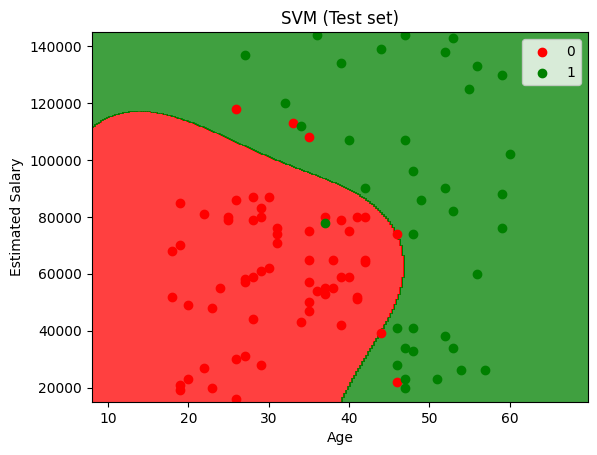

In [23]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Summary:
* We can see with the kernel SVM performance on the test set was much improved with the non-linear hyperplane and support vectors as compared to the previous notebook's vanilla SVM.